In [1]:
import sys
import argparse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymatgen.io.vasp.outputs 
from pymatgen.io.vasp.outputs import Wavecar
np.set_printoptions(precision=3)

/Users/samhood/anaconda2/lib/python2.7/site-packages/pymatgen/__init__.py:89: UserWarning: 
Pymatgen will drop Py2k support from v2019.1.1. Pls consult the documentation
at https://www.pymatgen.org for more details.
  at https://www.pymatgen.org for more details.""")


In [2]:
def read_wave_npy(wave_npy):
    return np.load(wave_npy)

def get_S_ifs(wf_path_i, wf_path_fs):
    """
    calculate overlaps
    real 
    Gamma point only
    """
    S_if_list = []
    wfc_i = read_wave_npy(wf_path_i)
    wfc_i /= np.sqrt(np.sum(wfc_i * np.conjugate(wfc_i)))
    for i, wf_path_f in enumerate(wf_path_fs):
        wfc_f = read_wave_npy(wf_path_f)
        wfc_f /= np.sqrt(np.sum(wfc_f * np.conjugate(wfc_f)))

        S_if = np.sum(wfc_i * np.conjugate(wfc_f))
        # S_if = np.dot(wfc_i, np.conjugate(wfc_f))
        # Gamma point only
        temp = np.absolute(S_if)
        # print(S_if)
        # temp = S_if
        if i > len(wf_path_fs)/2:
            sign = -1
        else:
            sign = 1
        S_if_list.append(temp * sign)
    return np.array(S_if_list)

def calc_W_if(ax, s_if_sq, del_eig, Qs):
    diff_overlap = np.gradient(s_if_sq, Qs)
    ax.plot(Qs, s_if_sq, '.-', label='S_if')
    ax.plot(Qs, diff_overlap, '.-', label='diff_overlap')

    print('W_if = (e_f - e_i)d<psi_i|psi_f>/dQ')
    print(del_eig*diff_overlap[int(len(diff_overlap)/2)])
    ax.legend()


IOError: [Errno 2] No such file or directory: '01_CZTSe/00_Sn_Zn_02-01/SnIV/wf_CBM.npy'

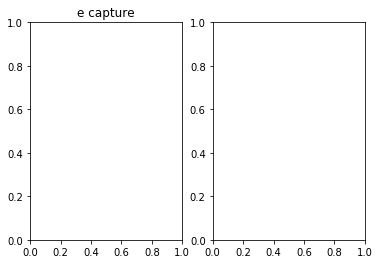

In [3]:
num_dirs = np.array([-10, -6, -4, -2, -1, 0, 1, 2, 4, 6, 10])
# ==============================================================================
# Sn_Zn 01 -- 02
Q_max = 4.917785025176118 # from -10 to 10
del_Q = Q_max/(max(num_dirs) - min(num_dirs))
Qs = num_dirs*del_Q
del_eig = 5.405963 - 6.227692
dir_path = '01_CZTSe/00_Sn_Zn_02-01/SnIV'
fig, (ax1, ax2) = plt.subplots(1, 2)

wf_path_i = "{}/wf_CBM.npy".format(dir_path)
wf_path_fs = ["{}/wf_{:03d}_k0b337.npy".format(dir_path, num) for num in num_dirs]
ax1.set_title('e capture')
s_if_sq = get_S_ifs(wf_path_i, wf_path_fs)
calc_W_if(ax1, s_if_sq, del_eig, Qs)

del_eig = 5.405963 - 4.216824
#dir_path = 'Sn_Zn01-02/wf/02_SnIV' # more localized
wf_path_i = "{}/wf_VBM.npy".format(dir_path)
wf_path_fs = ["{}/wf_{:03d}_k0b337.npy".format(dir_path, num) for num in num_dirs]
ax2.set_title('h capture')
s_if_sq = get_S_ifs(wf_path_i, wf_path_fs)
# print(s_if_sq)
calc_W_if(ax2, s_if_sq, del_eig, Qs)
# print(del_eig*2/Q_max)
# plt.show()

W_if = (e_f - e_i)d<psi_i|psi_f>/dQ
0.004694821690277952
W_if = (e_f - e_i)d<psi_i|psi_f>/dQ
-0.20812606807768075


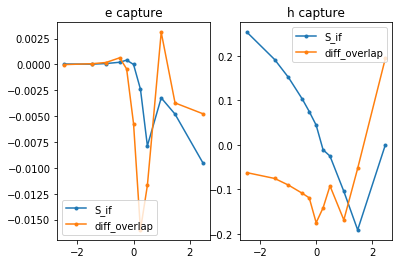

In [4]:
num_dirs = np.array([-10, -6, -4, -2, -1, 0, 1, 2, 4, 6, 10])
# ==============================================================================
# Sn_Zn 01 -- 02
Q_max = 4.917785025176118 # from -10 to 10
del_Q = Q_max/(max(num_dirs) - min(num_dirs))
Qs = num_dirs*del_Q
del_eig = 5.405963 - 6.227692
dir_path = '01_CZTSe/00_Sn_Zn_02-01/SnIII'
fig, (ax1, ax2) = plt.subplots(1, 2)

wf_path_i = "{}/wf_CBM.npy".format(dir_path)
wf_path_fs = ["{}/wf_n_{:03d}_k0b337.npy".format(dir_path, num) for num in num_dirs]
ax1.set_title('e capture')
s_if_sq = get_S_ifs(wf_path_i, wf_path_fs)
calc_W_if(ax1, s_if_sq, del_eig, Qs)

del_eig = 5.405963 - 4.216824
#dir_path = 'Sn_Zn01-02/wf/02_SnIV' # more localized
wf_path_i = "{}/wf_VBM.npy".format(dir_path)
wf_path_fs = ["{}/wf_p_{:03d}_k0b337.npy".format(dir_path, num) for num in num_dirs]
ax2.set_title('h capture')
s_if_sq = get_S_ifs(wf_path_i, wf_path_fs)
# print(s_if_sq)
calc_W_if(ax2, s_if_sq, del_eig, Qs)
# print(del_eig*2/Q_max)
# plt.show()